In [111]:
import glob
import os
import re
from collections import Counter

import matplotlib.pyplot as plt
from matplotlib import rcParams

import nltk
import pandas
import seaborn as sns
from nltk.util import ngrams

import json
from pprint import pprint

import numpy as np

import nltk
from nltk import ConditionalFreqDist, FreqDist

In [122]:
sns.set_context("paper", font_scale=1.2)
rcParams.update({'figure.autolayout': True})

GRAPHICS_DIR = "../../report/graphics/"

def load_dataf(fn):
    ff = json.load(open(f"../{fn}.json", "r"))
    return ff["rasa_nlu_data"]["common_examples"]

data = load_dataf("aggregated")

only_testing = load_dataf("test_rasa")
only_training = load_dataf("train_rasa")

In [113]:
entities = [[entity["entity"] for entity in entry["entities"]]
            for entry in data]
entities = list(item for sub in entities for item in sub)
print(f"There are a total of {len(entities)} entity examples")

There are a total of 4372 entity examples


In [114]:
intents = [d["intent"] for d in data]
print(f"There are a total of {len(intents)} intent examples")

There are a total of 4494 intent examples


In [120]:
print(f"There are a total of {len(set(entities))} different entities.")
print(f"There are a total of {len(set(intents))} different intents.")

There are a total of 24 different entities.
There are a total of 67 different intents.


In [124]:
print(f"There are {len(only_testing)} examples in the TEST set.")
print(f"There are {len(only_training)} examples in the TRAINING set.")

There are 1120 examples in the TEST set.
There are 3374 examples in the TRAINING set.


## Draw graphic of intents

D:\User\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
D:\User\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


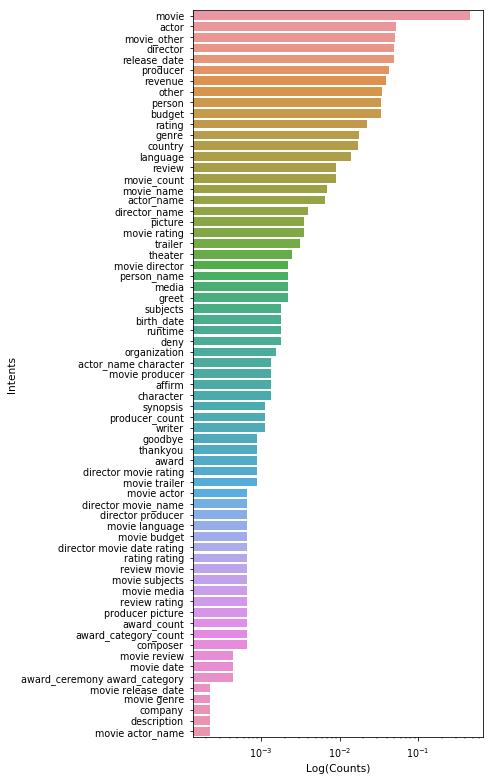

In [128]:
cfdist = FreqDist(intents)

figsize=(7, 11)
dtrain_setf=pandas.DataFrame(
        sorted(list((w, cfdist.freq(w)) for w in cfdist.keys()),
              key=lambda x: x[1], reverse=True),
        columns = ["Intents", "Log(Counts)"])


f, ax=plt.subplots(figsize = figsize)
#     plt.tight_layout()
ax.set(xscale="log")

g=sns.barplot(data = dtrain_setf, x = "Log(Counts)", y = "Intents")
g.get_figure().savefig(GRAPHICS_DIR + "intents_frequency" + ".png", 
                       dpi=400, bbox_inches='tight')

# Draw graphic of entities

D:\User\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
D:\User\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


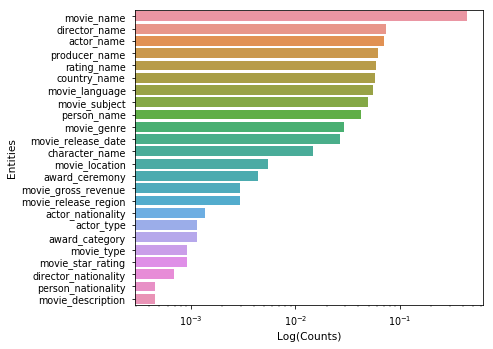

In [125]:
cfdist = FreqDist(entities)

figsize=(7, 5)
dtrain_setf=pandas.DataFrame(
        sorted(list((w, cfdist.freq(w)) for w in cfdist.keys()),
              key=lambda x: x[1], reverse=True),
        columns = ["Entities", "Log(Counts)"])


f, ax=plt.subplots(figsize = figsize)
#     plt.tight_layout()
ax.set(xscale="log")

g=sns.barplot(data = dtrain_setf, x = "Log(Counts)", y = "Entities")
g.get_figure().savefig(GRAPHICS_DIR + "entities_frequency" + ".png", 
                       dpi=400, bbox_inches='tight')

________________

# Scores

## NLU Confusion Matrix

In [117]:
conf_matrix_values = np.loadtxt('../../Evaluation/confusion_matrix_nlu.txt', dtype=int)
max_value = max(max(x) for x in conf_matrix_values)

conf_matrix_norm = [[xi/max_value for xi in x] for x in conf_matrix_values]

conf_matrix_labels = open('../../Evaluation/confusion_matrix_labels.txt', "r").read()
conf_matrix_labels = eval(conf_matrix_labels.replace("\n", "").replace(" ", ", "))

conf_matrix = {k: conf_matrix_values[i] for i, k in enumerate(conf_matrix_labels)}

D:\User\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


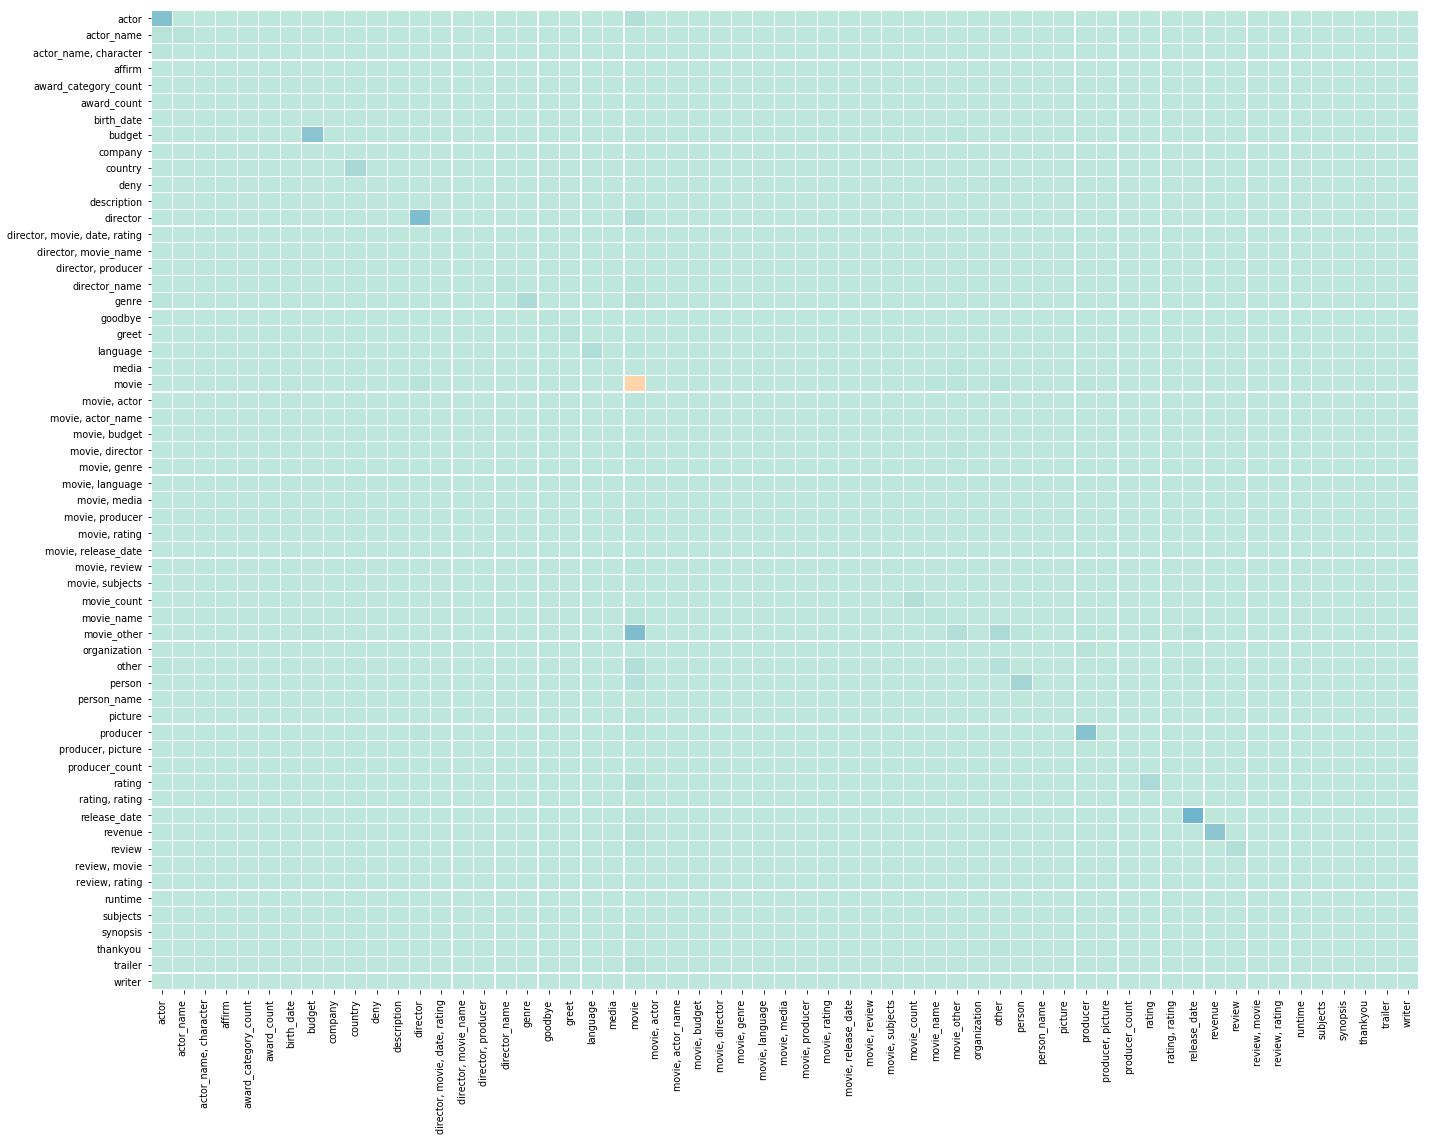

In [118]:
f, ax=plt.subplots(figsize = (20,16))
heatmap = sns.heatmap(conf_matrix_norm, linewidths=.2, fmt=".0f", center=0.5,cbar=False,
                      xticklabels=conf_matrix_labels,
                      yticklabels=conf_matrix_labels)

In [23]:
def drw_score_heatmap(df, name):
    data_heatmap = df[["method", "order", "FB1"]].pivot("order", "method", "FB1")
#     cmap = sns.diverging_palette(200, 20, as_cmap=True)
    heatmap = sns.heatmap(data_heatmap, annot=True, linewidths=.5, fmt=".2f")
    heatmap.get_figure().savefig(GRAPHICS_DIR + name + ".png", dpi=400)

D:\User\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


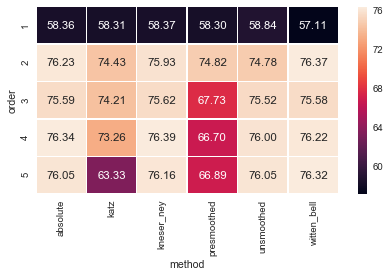

In [24]:
drw_score_heatmap(df_only_iob, "scores_heatmap_w2iob")

In [ ]:
df_only_iob.sort_values("FB1", ascending=False).head()

D:\User\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


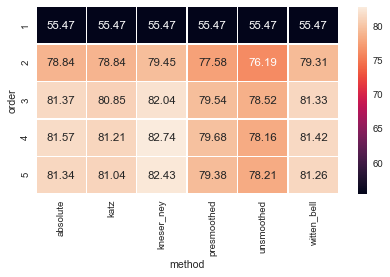

In [25]:
drw_score_heatmap(df_iob_and_w, "scores_heatmap_w2iob__w")

In [20]:
df_iob_and_w.sort_values("FB1", ascending=False).head()

,version,method,order,FB1,accuracy,precision,recall
43,iob_and_w,kneser_ney,4,82.74,94.96,82.44,83.04
44,iob_and_w,kneser_ney,5,82.43,94.91,82.09,82.77
42,iob_and_w,kneser_ney,3,82.04,94.84,81.60,82.49
33,iob_and_w,absolute,4,81.57,94.48,80.41,82.77
58,iob_and_w,witten_bell,4,81.42,94.42,80.12,82.77
